__Bank Loan Modelling__ 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


from warnings import filterwarnings
filterwarnings('ignore')

# Reading Dataset

In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- We have to predict whether to give the Personal Loan to customer or not.
and how much other factors are affecting Personal Loan

- Dependent Variable (Target variable) is Categorical

In [3]:
data.shape                    # checking shape of the dataset

(5000, 14)

In [4]:
data.info()                    # Checking information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Missing value treatment

In [6]:
data.isnull().sum()             # Checking for Null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Droping unnecessary Columns from dataset

In [8]:
data = data.drop(['ID','ZIP Code'], axis=1)
data.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


# Plotting Histogram

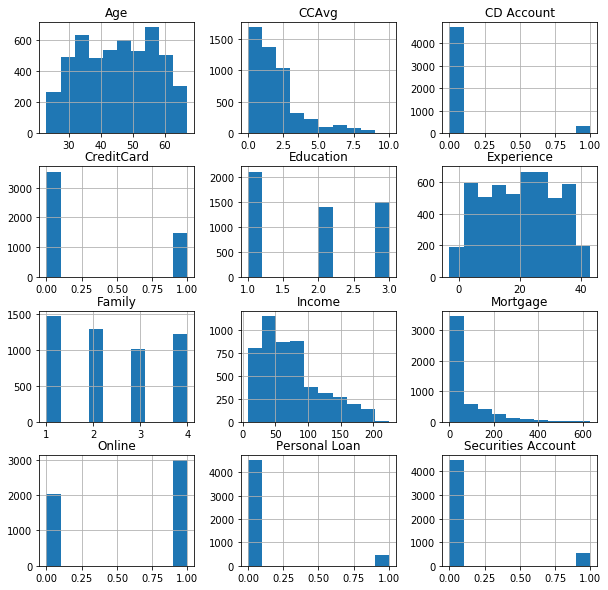

In [12]:
data.hist(figsize=(10,10))
plt.show()


Inference from Histogram - 

•	Dependent Variable is Binary Categorical Variable ( 0 or 1 )

•	CD Account, Credit Card, Education, Family, Online, Securities Account are Categorical Variables but in Encoded Format.


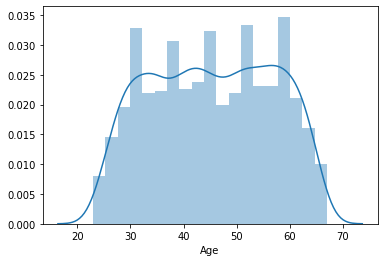

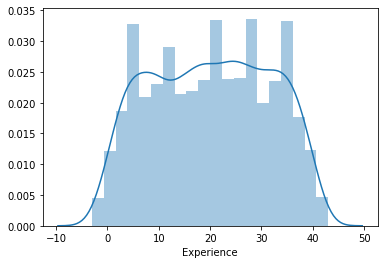

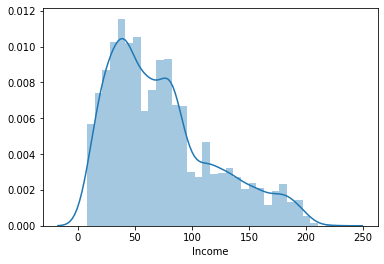

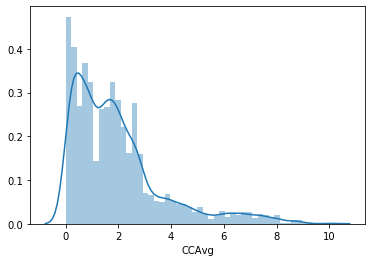

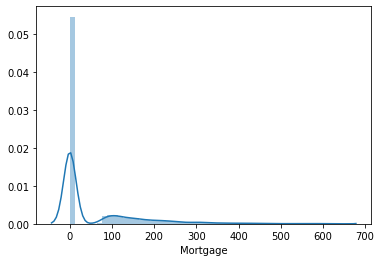

In [14]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in columns:
    sns.distplot(data[col])
    plt.show()



- __Inference from Distplot__ - 

•	Age, Experience, Income, CCAvg is Multimodal and has Positive Skewness (Mean > Median)

•	Mortgage is Bimodal and has Positive Skewness( Mean > Median)


# Outliers Treatment

In [ ]:
# checking Outliers using BoxPlot

columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for col in columns:
    sns.boxplot(df[col])
    plt.show()


- __Inference from Boxplot__ - 

•	Age, Experience, Family has No Outlier

•	Mortgage , CCAvg has Many Outliers

•	Income has Moderate Outliers


# Correlation

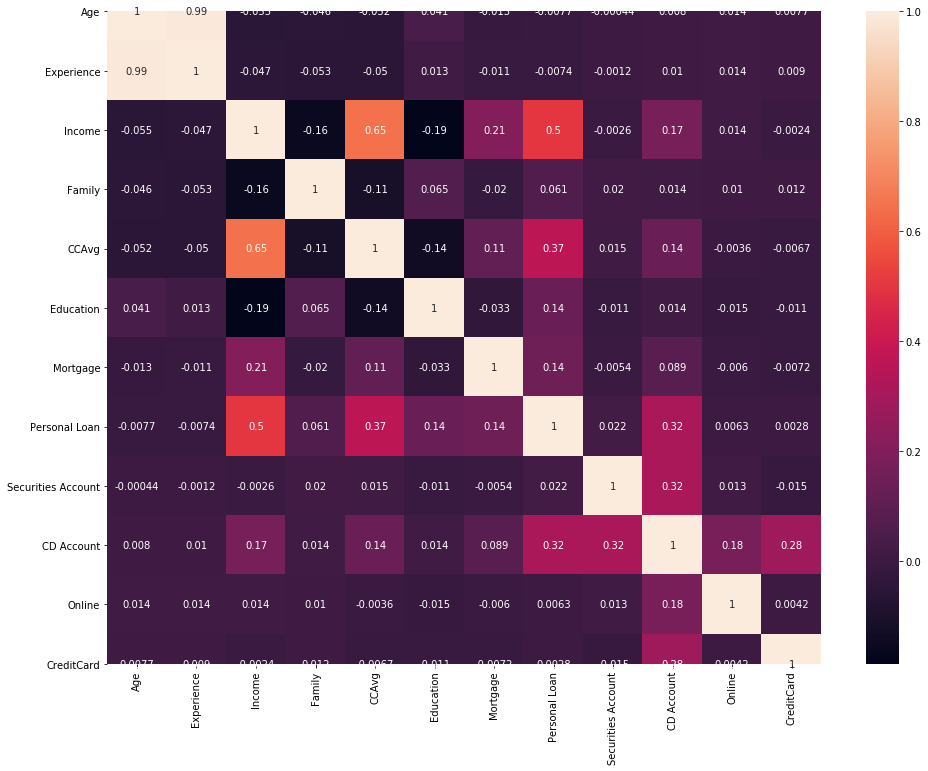

In [19]:
# Correlation Matrix

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot = True)


- __Infernece from Correlation Matrix__ - 

•	Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)

•	Personal Loan has Almost No Correlation with other Independent Variables.



# Application Of Decision Tree Model

In [21]:
from sklearn import tree
from sklearn import preprocessing

In [22]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [23]:
data.shape

(5000, 12)

# Spliting Dataset according to Important Columns

In [25]:
x = data.drop(['Personal Loan'], axis=1)
x.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [26]:
y = data.iloc[:,7:8]

y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


# Train the model using decision Tree

In [27]:
model = tree.DecisionTreeClassifier(max_depth=22)
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Predicting Score

In [29]:
model.score(x,y)

1.0

__Note__ : Seems to be Data is Overfitted as accuracy is 100% 

# Application of Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [32]:
rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

##### Checking Score

In [33]:
print("OOB Accuracy:")
print(rf_model.oob_score_);

OOB Accuracy:
0.9878


# Finding the Most Relevent Column to predict the Personal Loan

In [35]:
a = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']



In [37]:
for feature, imp in zip(a, rf_model.feature_importances_):
    print(feature,"\t\t : ",imp);


Age 		 :  0.04469889494936946
Experience 		 :  0.04522709527771137
Income 		 :  0.34588593927186656
Family 		 :  0.09525898918401153
CCAvg 		 :  0.18468124199180322
Education 		 :  0.16042539147290694
Mortgage 		 :  0.045745924744342206
Securities Account 		 :  0.005625002020464167
CD Account 		 :  0.05397445429953747
Online 		 :  0.008448066512407619
CreditCard 		 :  0.01002900027557953


- __Inference__ -

•	Income, CCAvg, Education, Family have value more than 0.05

•    Hence, they are important features

•    And affect the prediction of Personal Loan



# Splitting Dataset according to Important Columns

In [49]:
imp = data[['Income','CCAvg','Education','Family']]
imp.head()


,Income,CCAvg,Education,Family
0,49,1.6,1,4
1,34,1.5,1,3
2,11,1.0,1,1
3,100,2.7,2,1
4,45,1.0,2,4


# Fitting Decision Tree

In [50]:
model = tree.DecisionTreeClassifier(max_depth=8)
model.fit(imp,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Creating a Model

In [51]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [52]:
with open('dtree1.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Income','CCAvg','Education','Family'], out_file=f);


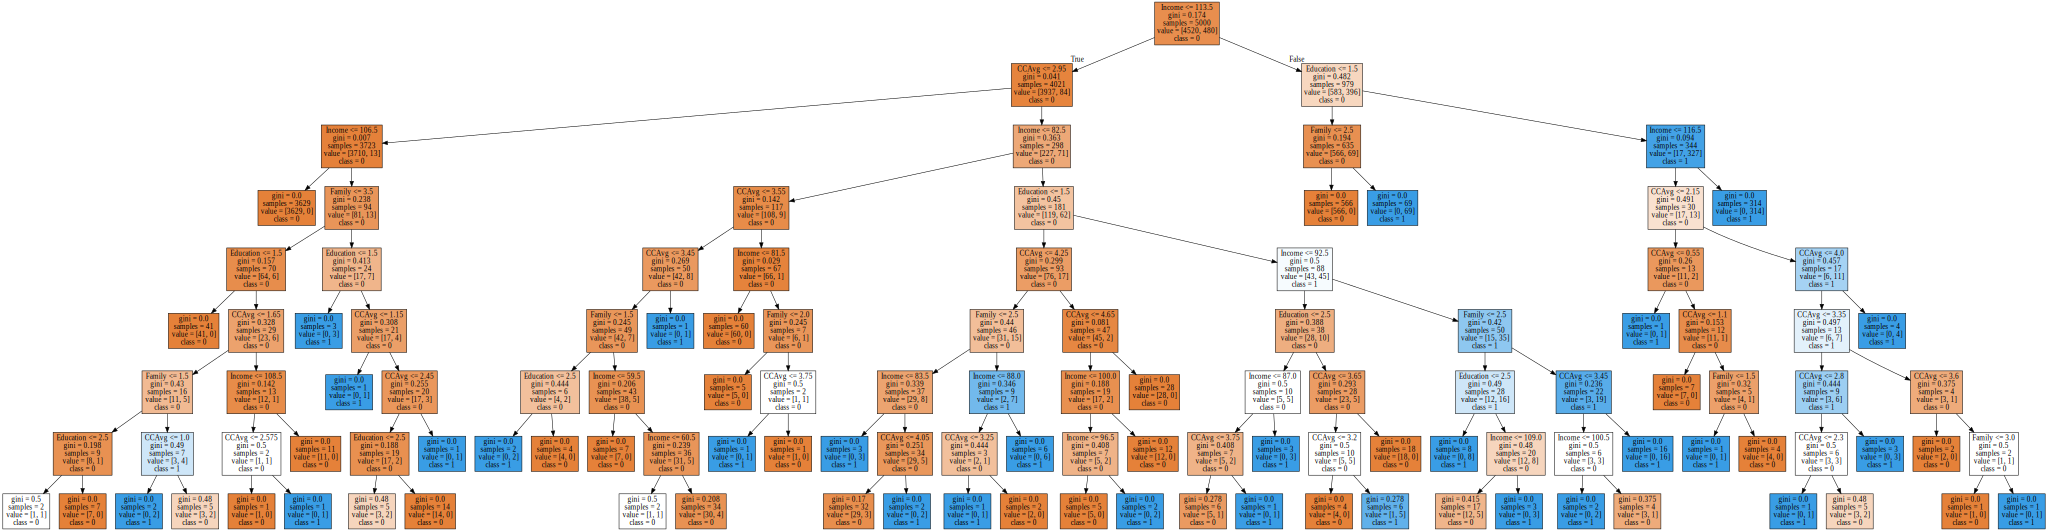

In [53]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Income','CCAvg','Education','Family'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))


##### Predicting Score

In [54]:
model.score(imp,y)

0.9954

# Random Forest

In [55]:
rf_model.fit(imp,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

## Accuracy Score

In [56]:
print("OOB Accuracy:")
print(rf_model.oob_score_);

OOB Accuracy:
0.988


__Conclusion__:

•	The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns.

•	The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)


___________